In [6]:
from fenics import *
import settings
import solution_io
import numpy as np
import matplotlib.pyplot as plt
import crosssection


In [9]:
#run experiments
experiments = []
experiments += [settings.experiment()]
experiments += [settings.experiment(name='wider_icestream',icestream_width=21e3)]
experiments += [settings.experiment(name='softer_margin',shearmargin_enhancement=9)]
experiments += [settings.experiment(name='softer_margin_shiftin',shearmargin_enhancement=9,shearmargin_enhancement_pos=-1.1e3)]
experiments += [settings.experiment(name='softer_margin_shiftout',shearmargin_enhancement=9,shearmargin_enhancement_pos=-1.0e3)]


for experiment in experiments:
    print(experiment['name'])
    crosssection.run_experiment(experiment)

control
Running 2d experiment:  control
xxxxxxxxxxxxx 0
Solving linear variational problem.
NON-LINEAR SOLVE!
Solving nonlinear variational problem.
  Newton solver finished in 14 iterations and 14 linear solver iterations.
saving to ../output//2d_control.h5
wider_icestream
Running 2d experiment:  wider_icestream
xxxxxxxxxxxxx 0
Solving linear variational problem.
NON-LINEAR SOLVE!
Solving nonlinear variational problem.
  Newton solver finished in 15 iterations and 15 linear solver iterations.
saving to ../output//2d_wider_icestream.h5
softer_margin
Running 2d experiment:  softer_margin
xxxxxxxxxxxxx 9
Solving linear variational problem.
NON-LINEAR SOLVE!
Solving nonlinear variational problem.
  Newton solver finished in 17 iterations and 17 linear solver iterations.
saving to ../output//2d_softer_margin.h5
softer_margin_shiftin
Running 2d experiment:  softer_margin_shiftin
xxxxxxxxxxxxx 9
Solving linear variational problem.
NON-LINEAR SOLVE!
Solving nonlinear variational problem.
  Ne

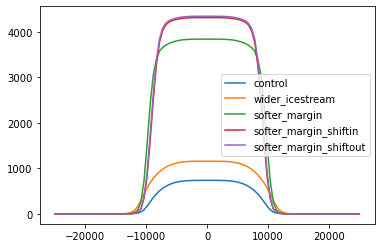

In [10]:

yr2sec = 365.25*24*60*60

experiments[-1]
x= np.linspace(-50e3/2,50e3/2,100)
def loadex(experiment):
    fname = settings.filename2d(experiment)
    results = solution_io.load_solution(fname)
    #mesh = results['mesh']
    usol = results['u']
    vfun = usol.sub(2)
    #psol = results['p']
    experiment = results['experiment']
    domain_h = experiment["domain_size"][2]
    v = np.empty(x.shape)
    for ix in range(len(x)):
        v[ix] = vfun(np.abs(x[ix]),domain_h)
    return v


v0 = loadex(experiments[-1])

for experiment in experiments:
    v = loadex(experiment)
    plt.plot(x,(v/v0)*yr2sec,label=experiment['name'])


plt.legend()